<a href="https://colab.research.google.com/github/eitanfass/Tomato_quality/blob/main/trained_model_for_final_project_tomato_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
tf.__version__

Mounted at /content/drive


'2.9.2'

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
!pip install -U -qq tensorflow==2.5.0
exit() # Runtime restart required!

--2023-01-19 15:51:56--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   199MB/s    in 2.1s    

2023-01-19 15:51:58 (199 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’ saved [430460776/430460776]

dpkg: warning: downgrading libcudnn8 from 8.1.1.33-1+cuda11.2 to 8.1.0.77-1+cuda11.2
(Reading database ... 129504 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.1.33-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+c

In [ ]:
# Notice how the TF version is now 2.5.0
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
!pip install git+https://github.com/kairess/Mask_RCNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kairess/Mask_RCNN to /tmp/pip-req-build-gwdnc4kh
  Running command git clone --filter=blob:none --quiet https://github.com/kairess/Mask_RCNN /tmp/pip-req-build-gwdnc4kh
  Resolved https://github.com/kairess/Mask_RCNN to commit d986b70959b14ecf2206674ab939123dee592461
  Preparing metadata (setup.py) ... done
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-py3-none-any.whl size=56957 sha256=3f8595de15ca0f563c779fb98180f695e252d5ff55cd55a799236590837c68e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-vq_hj2yg/wheels/12/64/44/01683b7f701da1414d31a49a32d0fb7eab9531ea14d09efa05
Successfully built mask-rcnn


In [ ]:
# let's make sure we have a GPU, under device_type
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7825749125015753831]

In [ ]:
# our GPU card is probably Tesla T4 (what we get from Google)
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# batch rename files script
# use it, if you downloaded a lot of images from google, and you want to rename them from img0 to img100 for example

# Python 3 code to rename multiple
# files in a directory or folder
import os
# Function to rename multiple files
def main():

  test_img_path='/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Eitan.Fass/final project/dataset/test'
  for count, filename in enumerate(os.listdir(test_img_path)):
    dst = f"image{str(count)}.jpg"
    src =f"{test_img_path}/{filename}" # foldername/filename, if .py file is outside folder
    dst =f"{test_img_path}/{dst}"
    
    # rename() function will
    # rename all the files
    os.rename(src, dst)

# Driver Code
if __name__ == '__main__':
	
	# Calling main() function
	main()

In [ ]:
import cv2
from skimage.color import label2rgb

In [ ]:
# import libs
import os
import sys
import json

import time
from PIL import Image, ImageDraw
import torch
import pandas as pd
from skimage import io,measure, img_as_ubyte
from mrcnn.config import Config
import mrcnn.utils as utils
from mrcnn import visualize
import mrcnn.model as modellib
import skimage

from google.colab import files
from matplotlib import pyplot as plt
from skimage import io
import glob
import numpy as np
from scipy.ndimage import measurements


In [ ]:
train_model=False #make this True to train the model again
device = (torch.device('cuda') if torch.cuda.is_available()
  else torch.device('cpu'))
print(f"Training on device {device}.")
ROOT_DIR = 'Mask_RCNN'
sys.path.append(ROOT_DIR) 
# Download the pretrained model
# This will default to sub-directories in your mask_rcnn_dir, but if you want them somewhere else, updated it here.
ROOT_DIR='/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Eitan.Fass/final project/saved models'
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# COCO_MODEL_PATH='/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Eitan.Fass/final project/saved models/logs/custom20230117T1904/mask_rcnn_custom_0005.h5'
# COCO_MODEL_PATH='/content/Mask_RCNN/logs/custom20221228T1436/mask_rcnn_custom_0030.h5'
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

Training on device cpu.


In [ ]:
class TrainConfig(Config):
    # Give the configuration a recognizable name
    NAME = "custom"

    # Train on 1 GPU and 1 image per GPU. Batch size is 1 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 5

    LEARNING_RATE = 0.001

    # Number of classes (including background) - IMPORTANT TO CHANGE ACCORDING TO YOUR LABELS IN YOUR JSON
    NUM_CLASSES = 1+4  # background + 1 (6 class)

    # All of our training images are 1920x1012
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    
    # Matterport originally used resnet101, but I downsized to fit it on my graphics card
    BACKBONE = 'resnet50' # resnet50

    # To be honest, I haven't taken the time to figure out what these do
    RPN_ANCHOR_SCALES = (32, 64, 128, 256, 512)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 60 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 
    
config = TrainConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     5
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 5
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [ ]:
class CocoLikeDataset(utils.Dataset):
    """ Generates a COCO-like dataset, i.e. an image dataset annotated in the style of the COCO dataset.
        See http://cocodataset.org/#home for more information.
    """
    def load_data(self, annotation_json, images_dir):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """
        # Load json from file
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()
        
        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']
            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(class_name))
                return
            
            self.add_class(source_name, class_id, class_name)
        
        # Get all annotations
        annotations = {}
        for annotation in coco_json['annotations']:
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)
        
        # Get all images and add them to the dataset
        seen_images = {}
        for image in coco_json['images']:
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))
                
                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                image_annotations = annotations[image_id]
                
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )
                
    def load_mask(self, image_id):
        """ Load instance masks for the given image.
        MaskRCNN expects masks in the form of a bitmap [height, width, instances].
        Args:
            image_id: The id of the image to load masks for
        Returns:
            masks: A bool array of shape [height, width, instance count] with
                one mask per instance.
            class_ids: a 1D array of class IDs of the instance masks.
        """
        image_info = self.image_info[image_id]
        annotations = image_info['annotations']
        instance_masks = []
        class_ids = []
        
        for annotation in annotations:
            class_id = annotation['category_id']
            mask = Image.new('1', (image_info['width'], image_info['height']))
            mask_draw = ImageDraw.ImageDraw(mask, '1')
            for segmentation in annotation['segmentation']:
                mask_draw.polygon(segmentation, fill=1)
                bool_array = np.array(mask) > 0
                instance_masks.append(bool_array)
                class_ids.append(class_id)

        mask = np.dstack(instance_masks)
        class_ids = np.array(class_ids, dtype=np.int32)
        
        return mask, class_ids

Train 8
test 2


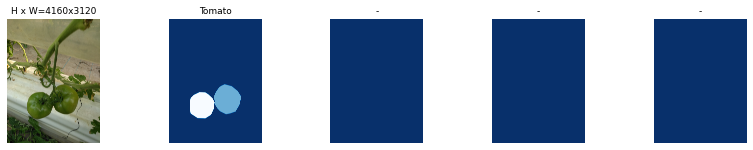

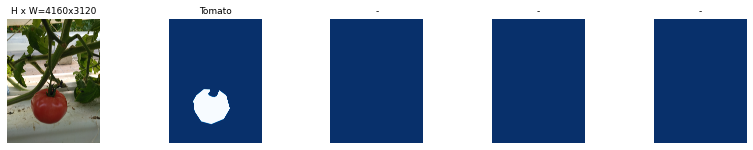

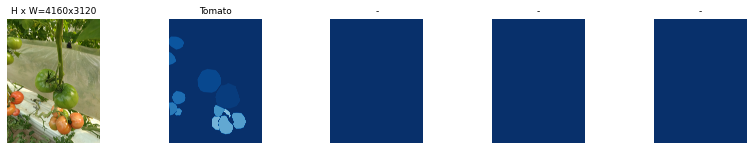

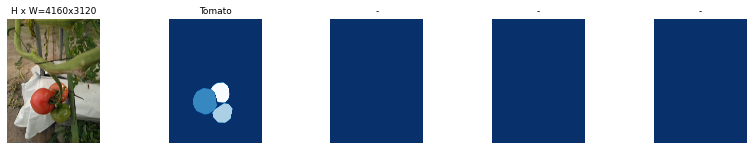

In [ ]:
root_folder = r'/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Eitan.Fass/final project'

dataset_train = CocoLikeDataset()
dataset_train.load_data(f'{root_folder}/dataset/train.json', f'{root_folder}/dataset/train/')
dataset_train.prepare()

dataset_test = CocoLikeDataset()
dataset_test.load_data(f'{root_folder}/dataset/test.json', f'{root_folder}/dataset/test/')
dataset_test.prepare()

image_ids = np.random.choice(dataset_train.image_ids, 4)

print('Train', len(dataset_train.image_ids))
print('test', len(dataset_test.image_ids))

for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
model = modellib.MaskRCNN(
    mode="training",
    config=config,
    model_dir=MODEL_DIR)

model.load_weights(
    COCO_MODEL_PATH,
    by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
if train_model==True:
  start_train = time.time()

  model.train(
      dataset_train,
      dataset_train, 
      learning_rate=config.LEARNING_RATE, 
      epochs=20, 
      layers='heads')

  end_train = time.time()
  minutes = round((end_train - start_train) / 60, 2)

  print(f'Training took {minutes} minutes')
  train_model=False

In [ ]:
class InferenceConfig(TrainConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.65 # CHANGE HERE IF YOU WANT

inference_config = InferenceConfig()

# Recreate the model in inference mode
test_model = modellib.MaskRCNN(
    mode="inference", 
    config=inference_config,
    model_dir=MODEL_DIR)

model_path = test_model.find_last()
print(model_path)

test_model.load_weights(model_path, by_name=True)

Instructions for updating:
Use fn_output_signature instead


/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Eitan.Fass/final project/saved models/logs/custom20230118T1341/mask_rcnn_custom_0020.h5
Re-starting from epoch 20


Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


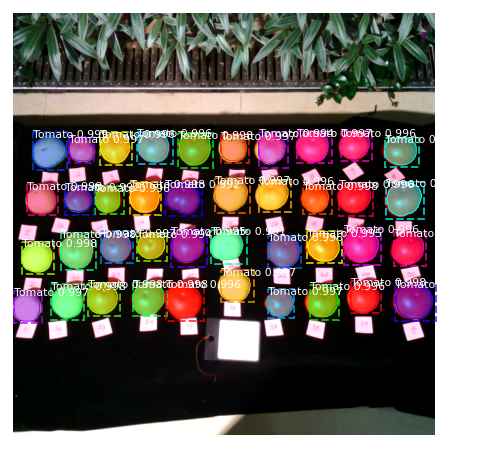

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


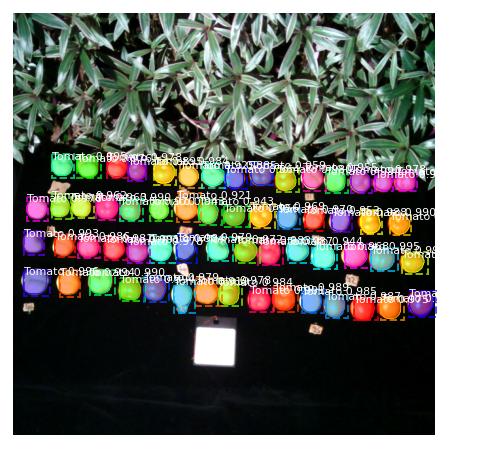

In [ ]:

mask_colors = [  (0.1, 0.1, 0.1), # Red
    (1, 0.1, 0.1)]

real_test_dir = f'{root_folder}/dataset/test'
image_paths = []

for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        image_paths.append(os.path.join(real_test_dir, filename))

for image_path in image_paths:
    img = io.imread(image_path)
    if img.shape[2]==4:
      img=img[:,:,:3]
    img_arr = np.array(img)
    
    results = test_model.detect([img_arr], verbose=1)
    r = results[0]

    colors = tuple(np.take(mask_colors, r['class_ids']))

    visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                                dataset_test.class_names, r['scores'], figsize=(16, 8),
                                )

In [ ]:
def mask_image(img):
  img_arr = np.array(img)

  results = test_model.detect([img_arr], verbose=1)
  r = results[0]
  class_names=['BG', 'Bird', 'Human', 'Cup (object)', 'Tomato']
  # colors = tuple(np.take(mask_colors, r['class_ids'], axis=0))

  visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], 
                              class_names, r['scores'], figsize=(16, 8), 
                              )
  return r

#corect mask labels

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


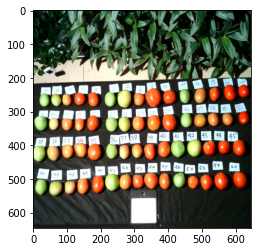

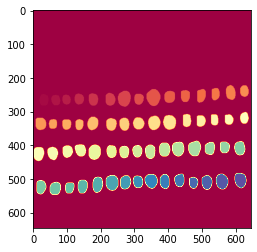

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


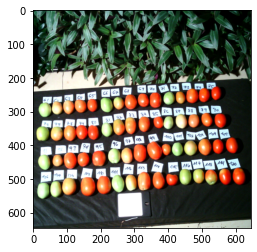

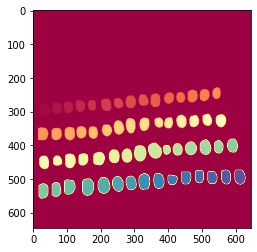

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


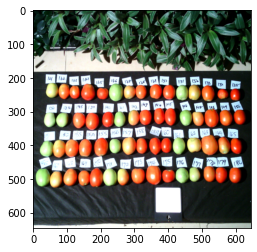

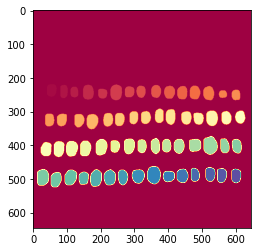

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


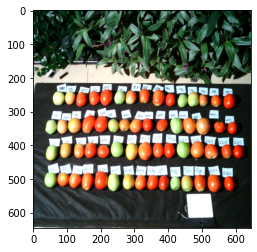

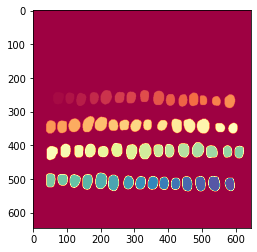

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


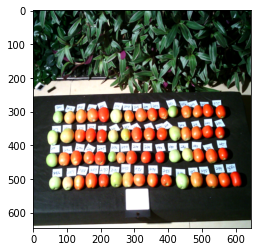

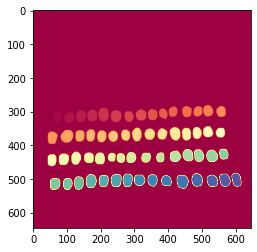

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


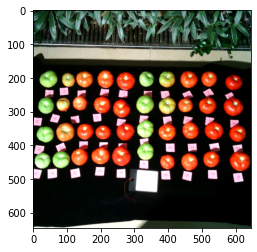

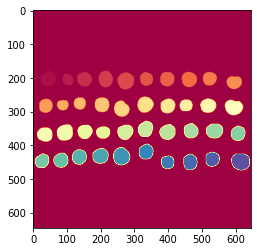

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


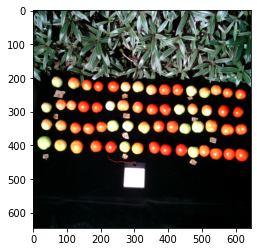

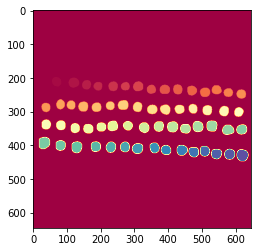

Processing 1 images
image                    shape: (645, 645, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max:  645.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32


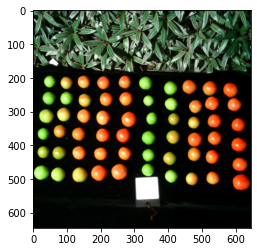

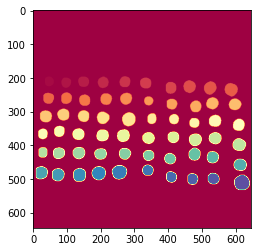

In [ ]:
import glob
from scipy.ndimage import binary_erosion
tomato_img_path='/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Eitan.Fass/final project/RGB spectrals'
path_list=glob.glob(f'{tomato_img_path}/*.*')
path_list=sorted(path_list,key= lambda x: int(x.split('_')[-1][:-4]))
number_per_row=[15,15,15,15,15,10,15,10]
mask_list=[]
sample_id=1
for path,number_per_row in zip(path_list,number_per_row):
  img=io.imread(path)
  if img.shape[2]==4:
      img=img[:,:,:3]
# call our function of the crnn trained model 
  img_arr = np.array(img)
  results = test_model.detect([img_arr], verbose=1)
  r = results[0]
  mask=np.zeros(img_arr.shape[:2])
  for i in range(r['masks'].shape[2]):
    mask_temp=r['masks'][:,:,i]
    r['label']=i
    mask+=mask_temp
  plt.imshow(img)
  plt.show()

 # Label the connected regions in the mask image
  labels, num_labels = measurements.label(mask)


  #element for erosion is a code that seperates two objects that are close to each other
  # Define the structuring element for erosion
  selem = np.ones((3,3))

  # Apply erosion to the binary mask
  eroded_mask = binary_erosion(mask, selem)

  # Label the objects in the eroded mask
  labels, num_labels = measurements.label(eroded_mask)

  # Create a list to store the coordinates of the centroids
  centroids = []

  # Iterate through the labels and calculate the centroid of each object
  for i in range(1, num_labels+1):
      # Get the binary image of the current object
      obj = labels == i
      # Calculate the centroid of the object
      y, x = measurements.center_of_mass(obj)
      # Append the centroid coordinates to the list
      centroids.append((x, y))
  sample_id+=num_labels
  # Sort the list of centroids based on the y-coordinate
  sort_centeroids=centroids.copy()
  sort_centeroids.sort(key=lambda x: x[1])
  sorted_centers=[]
  for i in range(int(num_labels/number_per_row)):
    row= sort_centeroids[i*number_per_row:(i+1)*number_per_row] # take only one row of tomatoes
    row.sort(key=lambda x: x[0])# sort row by x coords
    sorted_centers+=row
  labeled_centers={}

  # Initialize the label counter
  label_counter = 1

  # Iterate through the sorted centroids and assign labels
  for x, y in sorted_centers:
      # print(f'Object {label_counter} at coordinates ({x:.2f}, {y:.2f})')
      labeled_centers[label_counter]=(x,y)
      label_counter += 1 
  j=0
  k=0
  sort_dict={}
  sort_dict[0]=0
  for i in centroids:
    k+=1
    j=0
    for y in sorted_centers:
      j+=1
      if i==y:
        sort_dict[k]=j
        # print(k,j)

  for x in range(labels.shape[0]):
    for y in range(labels.shape[1]):
      labels[x,y]=sort_dict[labels[x,y]]
  plt.imshow(labels, cmap='Spectral')
  plt.show()
  mask_list+=[labels]





#modeling weight

In [ ]:
def pix_size(image_wr):
  hsv = cv2.cvtColor(image_wr, cv2.COLOR_RGB2HSV) # convert rgb to hsv
  new_mask = cv2.inRange(hsv, (0,0,240), (120,1,255)) # mask out the white refrence. range of hsv. from hsv1 to hsv2.

  label_image = measure.label(new_mask)

  image_label_overlay = label2rgb(label_image, image=image_wr) # display the labels, abovee our original iamge (img)

  props = measure.regionprops_table(label_image, image_wr,
                                    properties= ['label',
                                                'area', 'equivalent_diameter', 
                                                'mean_intensity', 'solidity'])

  df = pd.DataFrame(props)

  wr_pixel_number = df['area'].max()
  real_wr_area=10**2 #cm^2
  real_pixel_size = real_wr_area/wr_pixel_number

  return real_pixel_size

In [ ]:
data_df=pd.read_csv('/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Eitan.Fass/final project/weight_spectral_tomato_data.csv')
data_df=data_df.drop(['Unnamed: 0'], axis =1)
area_column=[]
for path,mask in zip(path_list,mask_list):
  unique_values = np.unique(mask)

  img=io.imread(path)
  if img.shape[2]==4:
      img=img[:,:,:3]
  ratio=pix_size(img)

  for i in unique_values[1:]:
    area_column += [np.count_nonzero(mask == i)*ratio]
data_df['area (cm^2)']=area_column
data_df

<ipython-input-19-a4629c85379c>:7: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(label_image, image=image_wr) # display the labels, abovee our original iamge (img)


,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,Weight (g),area (cm^2)
0,0.234992,0.193117,0.171576,0.158109,0.149803,0.143020,0.137435,0.133950,0.127398,0.124303,...,0.432211,0.436842,0.448151,0.454612,0.470242,0.481614,0.495605,0.433548,62.55,15.301935
1,0.218650,0.180657,0.155466,0.137660,0.130414,0.124646,0.123821,0.122417,0.119693,0.117253,...,0.436790,0.430843,0.447505,0.461956,0.472636,0.478695,0.488946,0.431260,61.54,13.386750
2,0.183938,0.149266,0.123637,0.103190,0.094193,0.083395,0.079451,0.072593,0.066707,0.060741,...,0.468611,0.464736,0.477447,0.490506,0.502068,0.506222,0.524563,0.433694,49.12,11.569279
3,0.206206,0.166735,0.134058,0.117680,0.102398,0.094059,0.081953,0.080009,0.068811,0.065451,...,0.449143,0.465980,0.466126,0.485269,0.481751,0.501109,0.505602,0.438231,71.07,14.363885
4,0.182368,0.148159,0.121511,0.105185,0.091930,0.083522,0.078564,0.072220,0.064085,0.060755,...,0.489851,0.494269,0.504742,0.517780,0.519484,0.539415,0.548464,0.452359,76.98,16.669924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.207544,0.166542,0.139623,0.123444,0.112656,0.103698,0.095445,0.088527,0.083721,0.077420,...,0.298009,0.302586,0.309841,0.315614,0.324516,0.333034,0.340040,0.324137,93.49,20.029674
456,0.135290,0.111071,0.095515,0.084843,0.078201,0.072905,0.068063,0.063631,0.061261,0.058128,...,0.286979,0.292326,0.297006,0.302199,0.308513,0.314041,0.320721,0.281766,95.10,19.460930
457,0.110284,0.088140,0.075678,0.067742,0.062872,0.059029,0.055713,0.053850,0.053433,0.051638,...,0.297635,0.302275,0.306187,0.311471,0.318766,0.324356,0.329904,0.281662,88.97,20.178042
458,0.131843,0.103111,0.085961,0.074589,0.066950,0.061880,0.056800,0.052926,0.050410,0.047316,...,0.302549,0.307158,0.311975,0.316717,0.323990,0.330276,0.336688,0.294564,99.87,21.909001


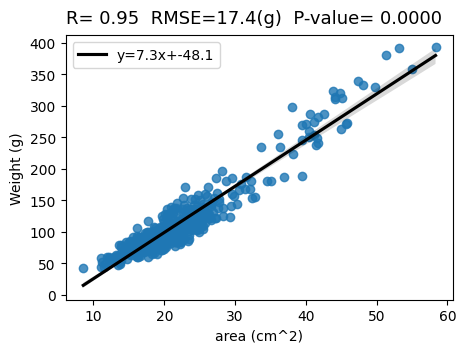

In [ ]:
from scipy import stats
import seaborn as sns
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(data_df['area (cm^2)']),np.array(data_df['Weight (g)']))
plt.rcParams.update({'figure.figsize':(5,3.5), 'figure.dpi':100})
ax = sns.regplot(x='area (cm^2)' , y='Weight (g)', data=data_df, scatter_kws={"zorder":-1}, line_kws={'color': 'black','label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

rmse =np.sqrt(((data_df['Weight (g)']-(intercept + (slope *data_df['area (cm^2)'])))**2).mean())
ax.text(0, 1.1, "R= {:.2f}  RMSE={:.1f}(g)  P-value= {:.4f}".format(r_value,rmse,p_value), ha="left", va="top",fontsize=13, transform=ax.transAxes)
ax.legend()

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# import tensorflow as tf
# from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler() 
feature_importances = {}

r_2_rf,rmse_rf,r_2_xg,rmse_xg,r_pslr,rmse_pslr=0,0,0,0,0,0
iter_num=30
bands=[140,151,181]#wavelengths 805,841,930 (nm)
for j in range(iter_num):

    x_df=data_df.iloc[:,bands]
    x_df['area (cm^2)']=data_df['area (cm^2)']
    y_df=np.array(data_df['Weight (g)'])
    
    x_df=np.array(scaler.fit_transform(x_df))
    X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


    # Calculate R^2 and RMSE for each output column
    # Train and evaluate an XGBoost model
    XGB_model = XGBRegressor(n_estimators=100, random_state=42)
    XGB_model.fit(X_train, y_train)
    y_pred = XGB_model.predict(X_test)
    slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_pred)
    r_2_xg+=r_value
    rmse_xg+=np.sqrt(mean_squared_error(y_test, y_pred))
    



<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df['area (cm^2)']=data_df['area (cm^2)']
<ipython-input-23-7a17e633b91c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

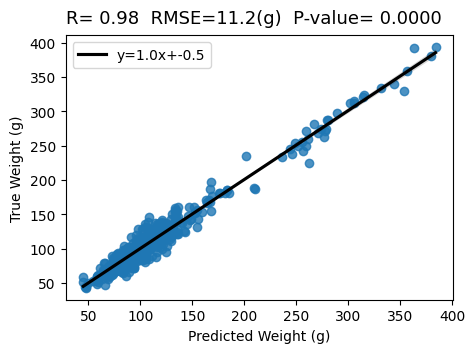

In [ ]:
y_pred = XGB_model.predict(x_df)
y_df
slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred,y_df)
data_dict={'True Weight (g)':y_df,'Predicted Weight (g)':y_pred}
data=pd.DataFrame(data_dict)
plt.rcParams.update({'figure.figsize':(5,3.5), 'figure.dpi':100})
ax = sns.regplot(x='Predicted Weight (g)' , y='True Weight (g)', data=data, scatter_kws={"zorder":-1}, line_kws={'color': 'black','label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

rmse =np.sqrt(((y_pred-(intercept + (slope *y_df)))**2).mean())
ax.text(0, 1.1, "R= {:.2f}  RMSE={:.1f}(g)  P-value= {:.4f}".format(r_value,rmse,p_value), ha="left", va="top",fontsize=13, transform=ax.transAxes)
ax.legend()